# Figure generation

In [2]:
# define and create the output folder if needed
import os
import sys
dir = r"./generated"
if not os.path.exists(dir):
    os.mkdir(dir)

In [3]:
import numpy as np
import pyvista as pv

# loading pypho
from pypho import target, graphics, camera

# using colorblind friendly settings
graphics.plt.style.use('tableau-colorblind10')

In [4]:
## Un comment this to generate static pyvista output
## for making the output visible in saved notebooks
#graphics.pv.set_jupyter_backend("static")

## NB: to come back to the normal behavior, replace "static" by "trame"

In [5]:
# # Activate Latex writing
# # This is slowing down the graphics dramatically, so only use for final paper rendering
# graphics.plt.rcParams["text.usetex"] = True
# graphics.plt.rcParams["font.family"] = "serif"


In [6]:
# in case the modules need to be reloaded
import importlib
importlib.reload(camera)
importlib.reload(graphics)
importlib.reload(target)

<module 'pypho.target' from 'C:\\Users\\glaurent\\Documents\\Dev\\Projects\\PyPho\\pypho\\target.py'>

## Sharpness zone figures

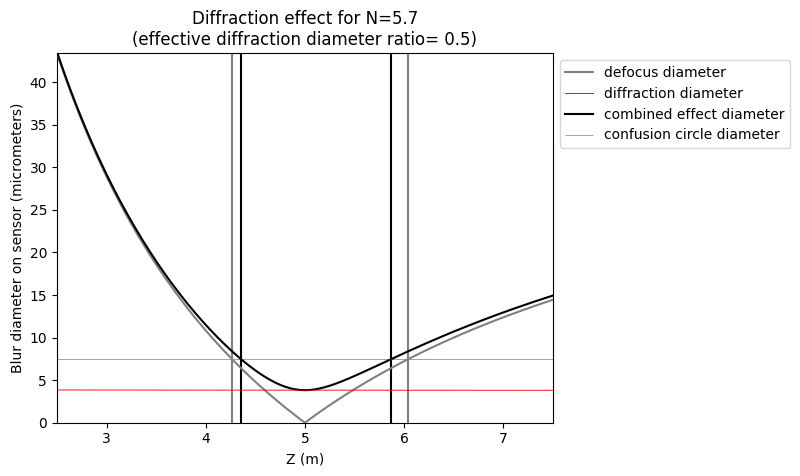

In [7]:
fig = graphics.plot_diffraction_effect(camera.get_default_camera(), Z= 5, N= 5.7, effective_part= 0.5)

In [8]:
fig.savefig(dir+"\\dof_vs_aperture.svg")

0.3


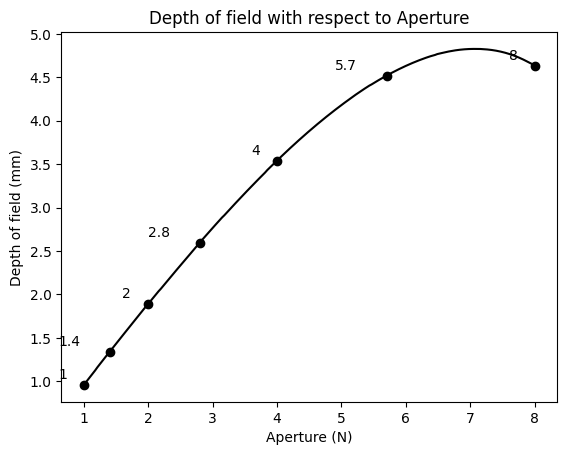

In [9]:
cam = camera.get_default_camera()
fig = graphics.plot_depth_of_field_vs_aperture(cam, effective_diffraction_disk_ratio= 0.5)
print(cam.Z)

In [10]:
fig.savefig(dir+"\\optimal_N.svg")

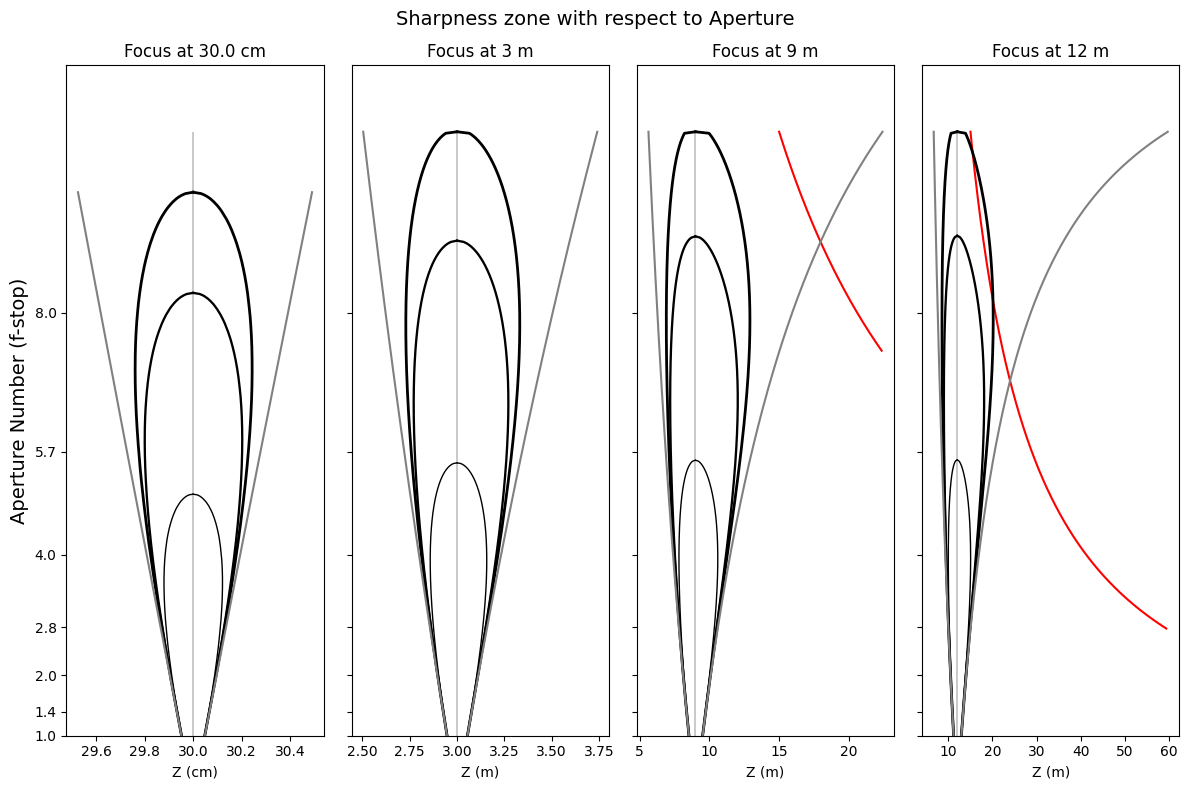

In [11]:
graph = graphics.plot_sharpness_zone_vs_aperture(camera.get_default_camera(),
                                         Z_list=[0.3, 3, 9, 12])

In [12]:
graph.fig.savefig(dir+"\\sharpness_vs_aperture.svg")

C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:496: RuntimeWarning: invalid value encountered in divide
  return (2 * special.jv(1,x)/x)**2


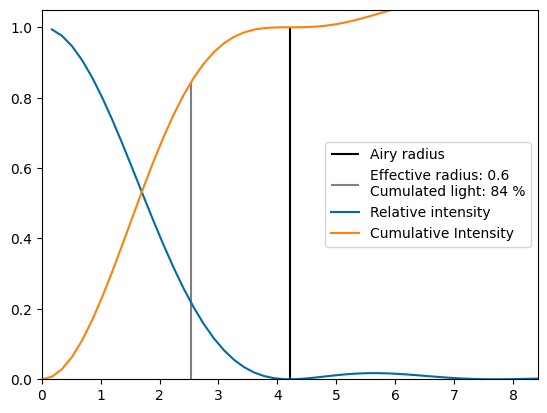

In [13]:
cam = camera.get_default_camera()
fig = graphics.plot_diffraction_intensity_graph(cam)


In [14]:
fig.savefig(dir+"\\diffraction_intensity.svg")

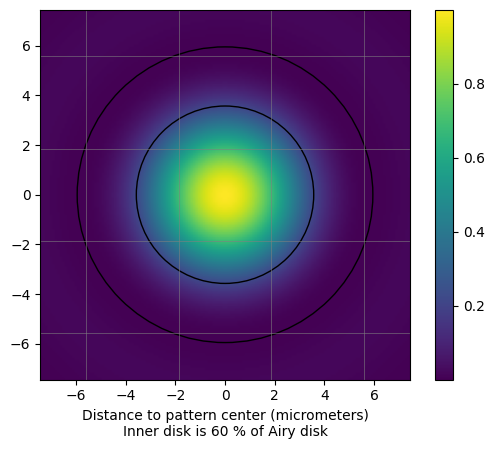

In [15]:
cam = camera.get_default_camera()
cam.update_aperture(8)
fig = graphics.plot_diffraction_pattern(cam, cam.Z)


In [16]:
fig.savefig(dir+"\\diffraction_patter.svg")

# Resolution graphics

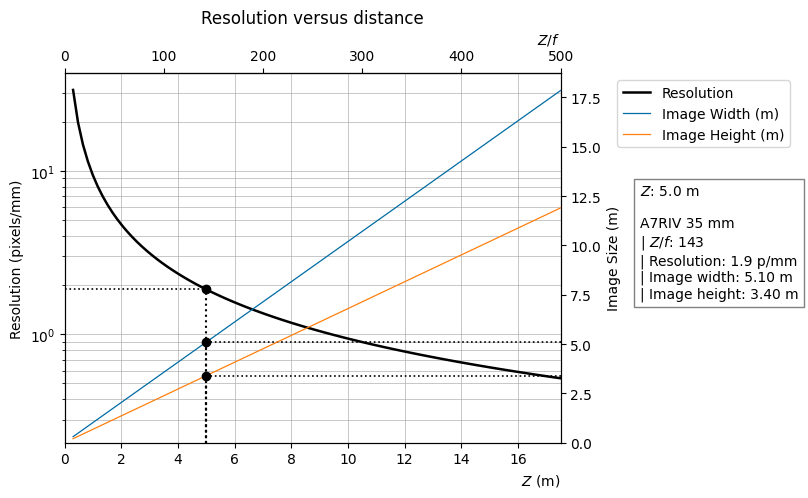

In [17]:
cam = camera.get_default_camera()
graph = graphics.plot_resolution_graph(cam, second_yaxis= "ImageSize", z_ref = 5)

In [18]:
graph.fig.savefig(dir+r"\\resolution_vs_image.svg")

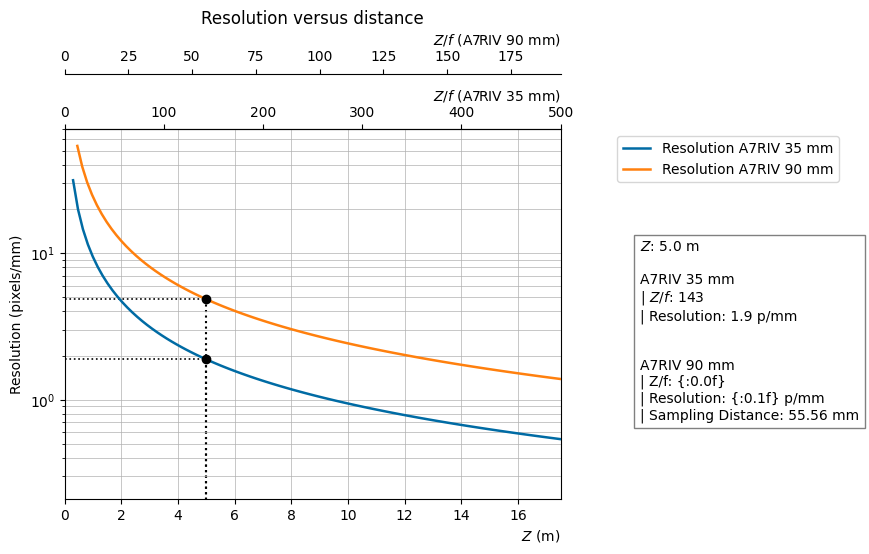

In [19]:
cam = camera.get_default_camera()
cam2 = camera.Camera(cam_id= "A7RIV", focal= 90, min_focus_distance= 0.45)
graph = graphics.plot_resolution_graph(cam, secondary_cam=[cam2], z_ref = 5)

In [20]:
graph.fig.savefig(dir+r"\\resolution.svg")

## Depth precision Graph

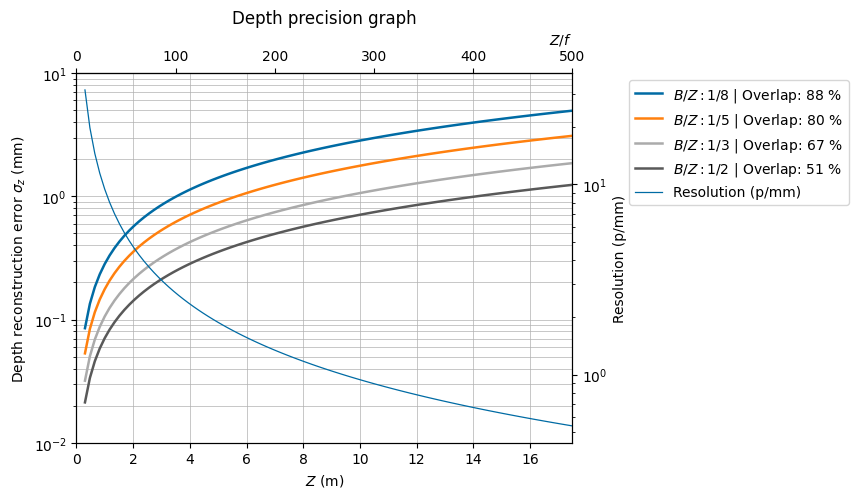

In [21]:
cam = camera.get_default_camera()
graph = graphics.DepthPrecisionGraphVSFocus(cam,
                                     B_Z_ratio= [1/8,1/5,1/3, 1/2],
                                     use_log= True,
                                     rescale_y= True
                                     )
graph.plot()

In [22]:
graph.fig.savefig(dir+r"\\depth_precivion_vs_focus.svg")

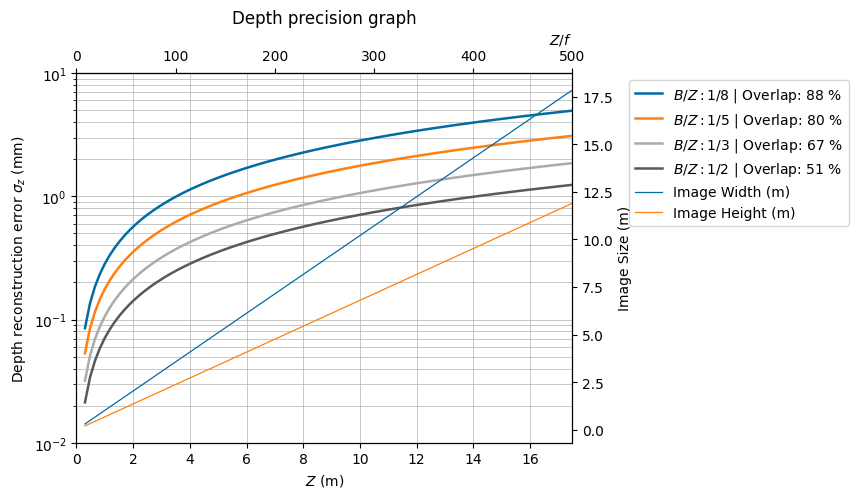

In [23]:
cam = camera.get_default_camera()
graph = graphics.DepthPrecisionGraphVSFocus(cam,
                                     B_Z_ratio= [1/8,1/5,1/3, 1/2],
                                     use_log= True,
                                     rescale_y= True,
                                     second_yaxis= "ImageWidth"
                                     )
graph.plot()

In [24]:
graph.fig.savefig(dir+r"\\depth_precivion_vs_focus.svg")

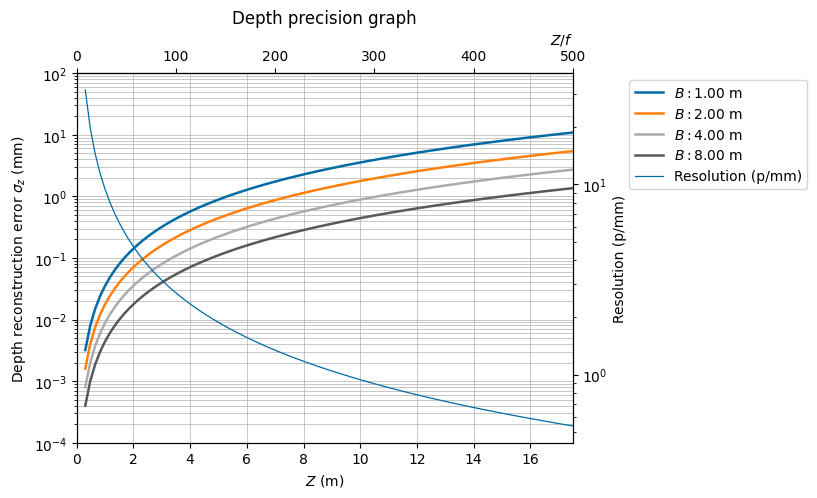

In [25]:
cam = camera.get_default_camera()
graph = graphics.DepthPrecisionGraphVSFocus(cam,
                                     B= [1, 2, 4, 8],
                                     use_log= True,
                                     rescale_y= True
                                     )
graph.plot()

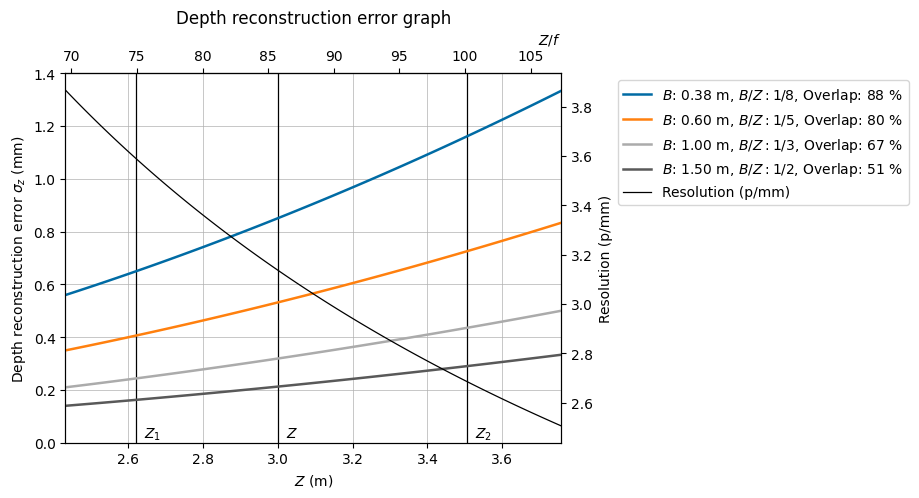

In [26]:
cam = camera.get_default_camera()
cam.update_focus(3)
cam.update_aperture(8)
graph = graphics.DepthPrecisionGraph(cam,
                                     B_Z_ratio= [1/8,1/5,1/3, 1/2],
                                     z_padding_ratio= 0.5,
                                     second_yaxis= "Resolution",
                                     use_log= False
                                     )
graph.plot()

In [27]:
graph.fig.savefig(dir+r"\\depth_precision.svg")

## Pypho demo

In [28]:
# base shape samples
sphere = target.Sphere(radius= 0.25, translation= [0,1,0])
core = target.DrillCore(radius= 0.3, height= 0.5)
cube = target.CubeSample(side_lengths = [0.5, 0.6, 0.25], translation= [1,0,0])

# Pebble
pebble = target.get_pebble_dataset(s = 0.75)
rock_texture = target.get_rock_texture()
pebble.translate([0.8,0.8,0])

# Viewer
viewer = graphics.Viewer3D(objects = [sphere, core, cube])
viewer.show()
viewer.add_object(pebble, texture= rock_texture, update= True)

viewer.plotter.show_grid(axes_ranges=[0, 1, 0, 1, 0, 1])
viewer.plotter.camera.position = (3.1336787277351177, 2.7539673765312314, 1.1000850397563426)
viewer.plotter.camera.focal_point = (0.5611326301853999, 0.4522391147479705, 0.11621837938920856)

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x267d7e3c400_0&reconnect=auto" class="pyvis…

In [29]:
viewer.plotter.save_graphic(dir+"\\target_rock_samples.svg")

In [30]:
outcrop = target.Outcrop(
    width = 5,
    height = 3,
    translation= [2,0,0],
    rotation= [0,10]
)

ground = target.Ground(
    side_lengths = [8,5],
    translation = [-2.1,0,0],
    rotation = None
)

# Viewer
viewer = graphics.Viewer3D(objects = [outcrop, ground])
viewer.show()

viewer.plotter.camera.position = (-5.145301020497831, 11.293331142472608, 5.848709445635152)
viewer.plotter.camera.focal_point = (-1.0898307566569574, -0.5390675172335859, 0.4314481807155682)

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x267d7e3e2c0_1&reconnect=auto" class="pyvis…

In [31]:
viewer.plotter.save_graphic(dir+"\\target_outdoor.svg")

In [32]:
room = target.Room(
    side_lengths = [8,7,3],
    translation = None,
    rotation = None
)

well = target.Well(
    radius = 3,
    height = 1.5,
    translation = [8,0,0],
    rotation = None
)
# Viewer
viewer = graphics.Viewer3D(objects = [room, well])
viewer.show()

viewer.plotter.camera.position = (6.282313712679022, -21.6031520171581, 7.610621254793427)
viewer.plotter.camera.focal_point = (3.3555814490823144, 1.5278961498963335, 1.3252109210809997)

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x267d8176dd0_2&reconnect=auto" class="pyvis…

In [33]:
viewer.plotter.save_graphic(dir+"\\target_indoor.svg")

In [34]:
from pyvista import examples
hills = target.TargetObject(examples.load_random_hills())

# customize scalar bar
sargs = dict(height=0.25, width= 0.05, vertical=True, position_x=0.85, position_y=0.25)

# Viewer
viewer = graphics.Viewer3D(objects = hills, scalar_bar_args= sargs)
viewer.show()

viewer.plotter.camera.position = (35.04852783490205, 53.10461812140392, 13.831437056385063)
viewer.plotter.camera.focal_point = (0.0, 9.99999999999999, 3.8123348355293274)


Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x267d8177520_3&reconnect=auto" class="pyvis…

In [35]:
viewer.plotter.save_graphic(dir+"\\pyvista_object.svg")

# Camera manipulations

In [69]:
obj, cam, viewer= graphics.get_default_scene(obj_size= 0.5)

viewer.plotter.parallel_projection = True
viewer.plotter.camera.position = np.array([0, -0.5, 0])
viewer.plotter.camera.focal_point = viewer.plotter.camera.position + np.array([0,1,0])
viewer.plotter.camera.up = [0,0,1]

viewer.plotter.remove_bounds_axes()

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x2684be6d690_16&reconnect=auto" class="pyvi…

In [38]:
viewer.plotter.save_graphic(dir+"\\move.svg")

In [78]:
cam.update_focal(35, force= True)
cam.optimize_sharpness(mode="front", use_diffraction= True, optimize_N= True)
viewer.set_active_scalars("defocus_diameter", vmin=0,
                    cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= obj, 
                                                            vmin=0,  field= "defocus_diameter")
                )
viewer.update()
viewer.plotter.save_graphic(dir+f"\\focus_update.svg")

In [76]:
cam.update_aperture(8.8)
viewer.set_active_scalars("defocus_diameter", vmin=0,
                    cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= obj, 
                                                            vmin=0,  field= "defocus_diameter")
                )
viewer.update()
viewer.plotter.save_graphic(dir+f"\\aperture_update.svg")

In [77]:
viewer.plotter.save_graphic(dir+f"\\aperture_update.svg")

In [63]:
viewer.plotter.save_graphic(dir+f"\\focus_update.svg")

In [ ]:
cam.update_focal(90, force= True)
cam.update_aperture(22)
viewer.update()


In [68]:

viewer.plotter.save_graphic(dir+f"\\focal_update_90.svg")

In [ ]:
cam.update_focal(18, force= True)
cam.update_aperture()
viewer.update()


In [66]:
viewer.plotter.save_graphic(dir+f"\\focal_update_18.svg")

# Texturing

In [19]:

importlib.reload(graphics)
importlib.reload(camera)

<module 'pypho.camera' from 'C:\\Users\\glaurent\\Documents\\Dev\\Projects\\PyPho\\pypho\\camera.py'>

In [7]:
from pyvista import examples
hills = target.TargetObject(examples.load_random_hills())

# customize scalar bar
sargs = dict(height=0.25, width= 0.05, vertical=True, position_x=0.85, position_y=0.25)

# Viewer
viewer = graphics.Viewer3D(objects = hills, scalar_bar_args= sargs,
                           plot_camera_orientation= True,
                           camera_orientation_scaling= 25
                           )
viewer.show()

viewer.plotter.camera.position = (21,42.6,13)
viewer.plotter.camera.focal_point = (-3,13,2)
viewer.plotter.camera.distance= 40
viewer.plotter.camera.roll= -109

cam = camera.get_default_camera()
cam.move(10, "up")
cam.attach_target(hills)
cam.orbit(60, hills.center)
cam.move(6, "right")
cam.move(2)
viewer.add_camera(cam)


Widget(value='<iframe src="http://localhost:58739/index.html?ui=P_0x178d222e920_0&reconnect=auto" class="pyvis…

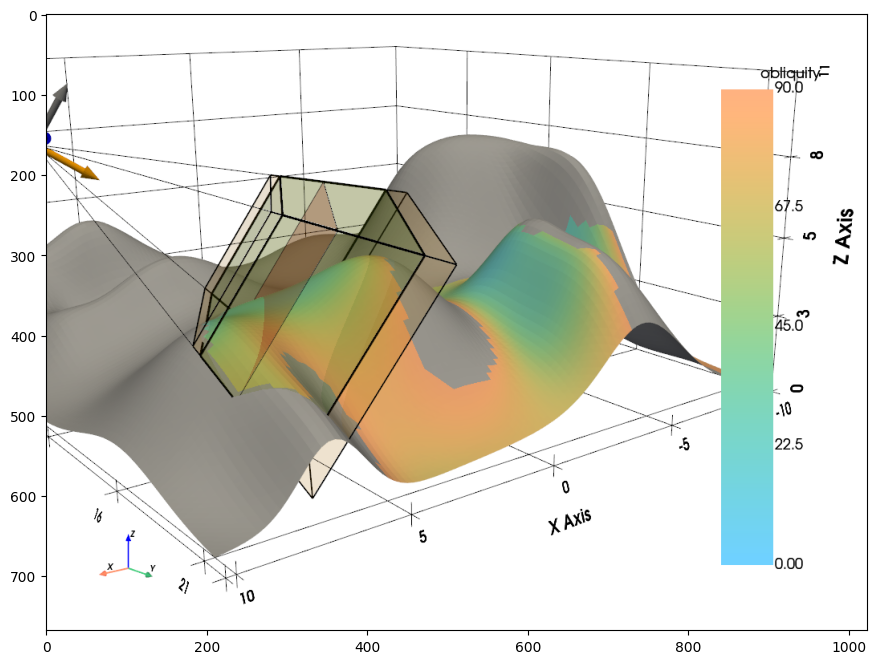

In [8]:
field = "obliquity"
viewer.set_active_scalars(field, vmax= 90, vmin= 0, vertical= True, cmap= "isolum")
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

A view with name (P_0x178d222e920_0) is already registered
 => returning previous one


Widget(value='<iframe src="http://localhost:58739/index.html?ui=P_0x178d222e920_0&reconnect=auto" class="pyvis…

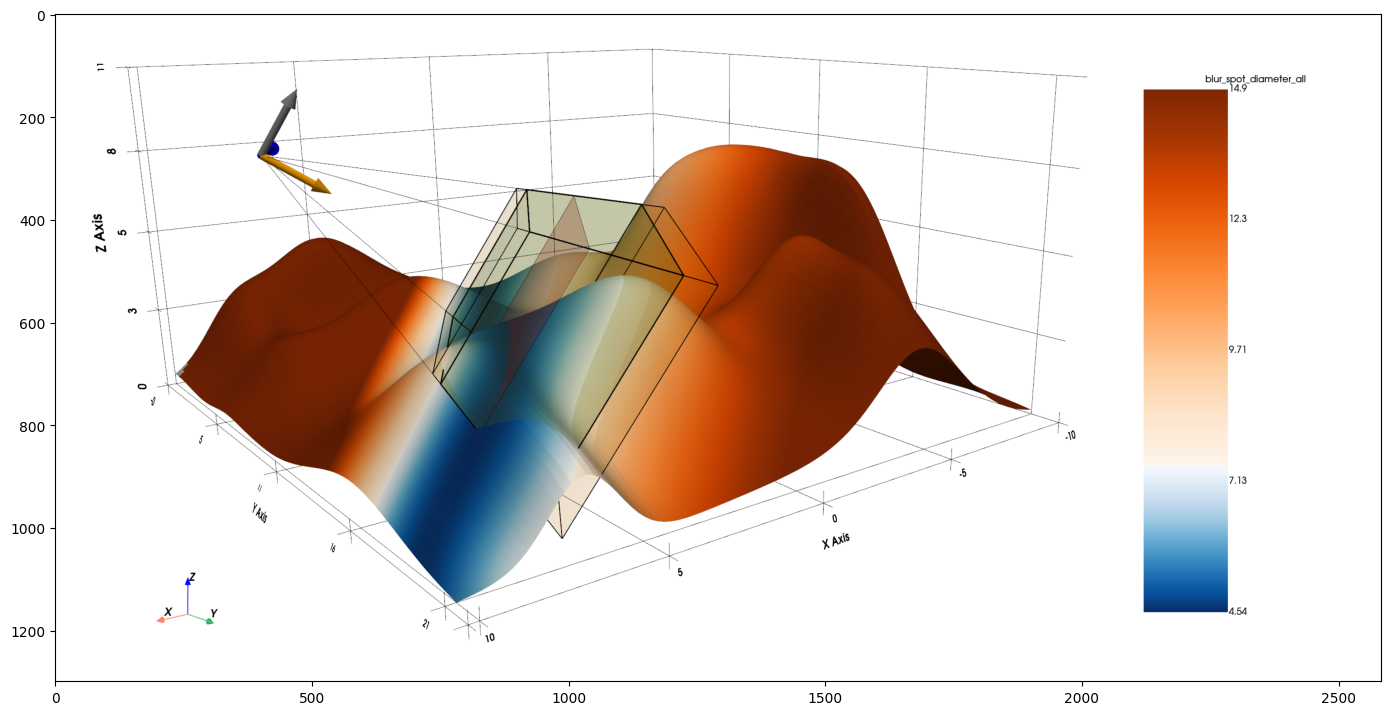

In [17]:
field = "blur_spot_diameter_all"
vmax = 2* cam.confusion_circle_diameter * 1000
viewer.set_active_scalars(field, vmax= vmax, vertical= True,
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= hills, vmax=vmax,
                                                                  field=field)
                )
scaling = 2
width_inches = scaling * 22/2.54
aspect = 16/8
height_inches = width_inches/ aspect
width_pix = int(width_inches*300)
height_pix= int(width_pix/aspect)

viewer.plotter.enable_anti_aliasing= True
graphics.plt.imshow(viewer.plotter.show(window_size=[width_pix, height_pix], screenshot= True, auto_close= True))
graphics.plt.gcf().set_size_inches((width_inches,height_inches))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

In [27]:
hsize= 2100
viewer.plotter.ren_win.OffScreenRenderingOn()
viewer.plotter.enable_anti_aliasing()
viewer.plotter.screenshot("try.png", transparent_background=False, 
                          window_size=[hsize, int(hsize*viewer.plotter.window_size[1]/viewer.plotter.window_size[0])],
                          scale= 3)
viewer.plotter.ren_win.SetSize([1000, 800])
viewer.plotter.ren_win.OffScreenRenderingOff()
viewer.plotter.ren_win.Render()

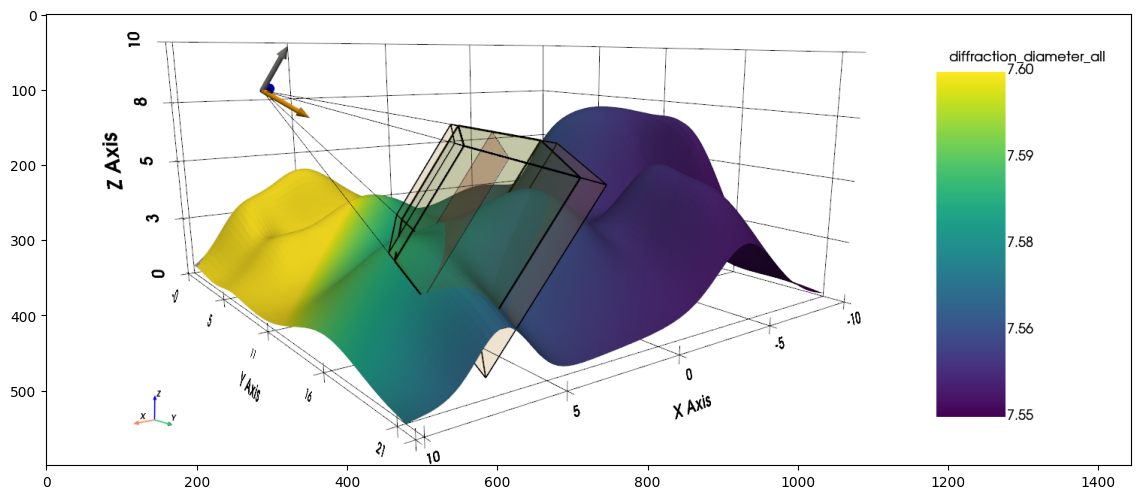

In [144]:
field = "diffraction_diameter_all"
vmax = 2* cam.confusion_circle_diameter * 1000
viewer.set_active_scalars(field, vmax= 7.6, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

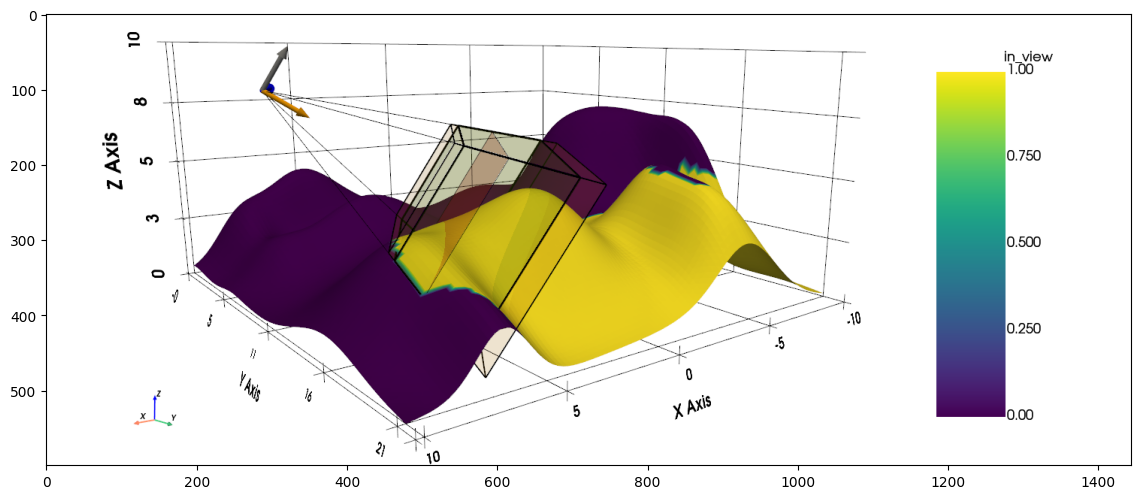

In [145]:
field = "in_view"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

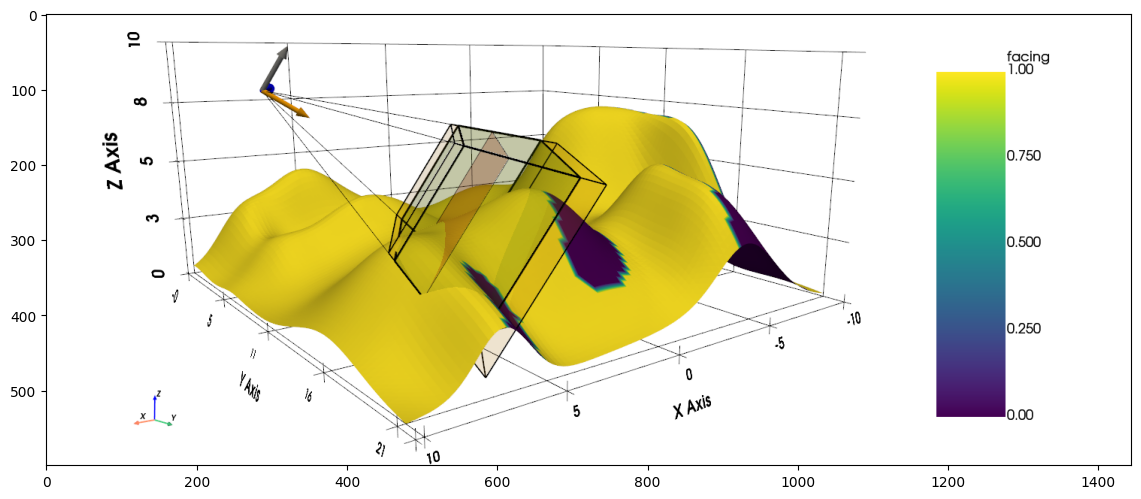

In [146]:
field = "facing"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

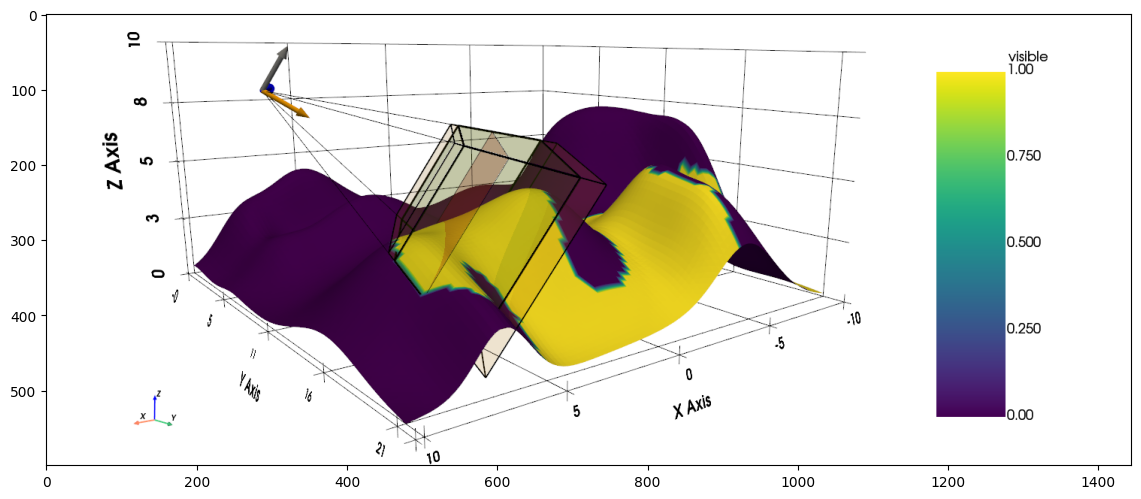

In [147]:
field = "visible"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

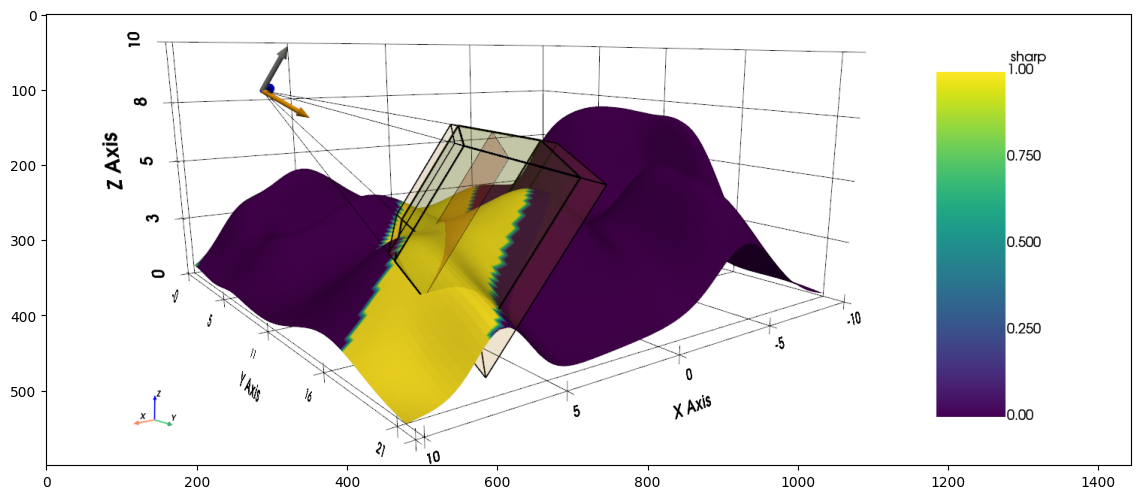

In [148]:
field = "sharp"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

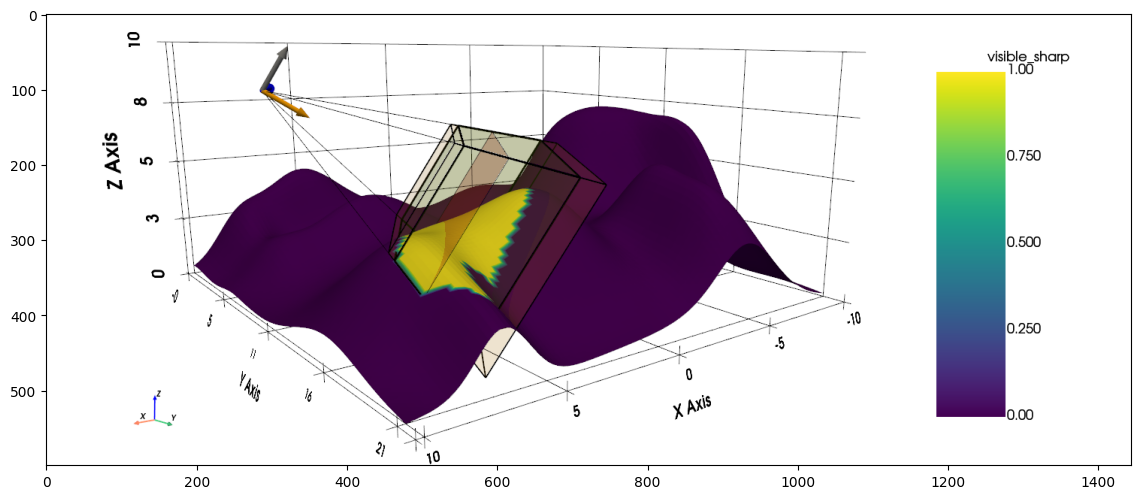

In [149]:
field = "visible_sharp"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

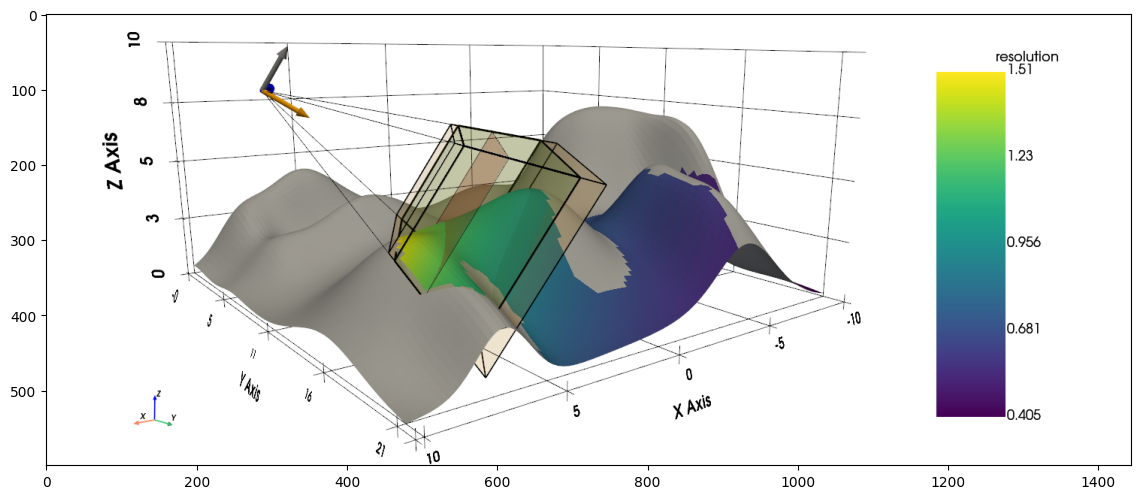

In [150]:
field = "resolution"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

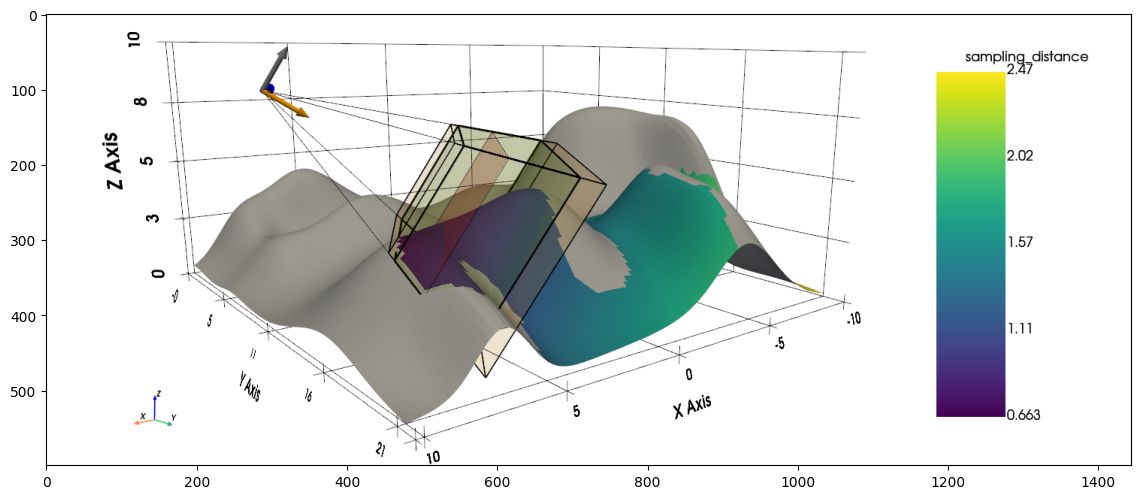

In [151]:
field = "sampling_distance"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

In [36]:
# additional scalar fields when shooting the pictures
cam.trigger()
cam.move(2, "left")
cam.trigger()
cam.move(2, "left")
cam.trigger()

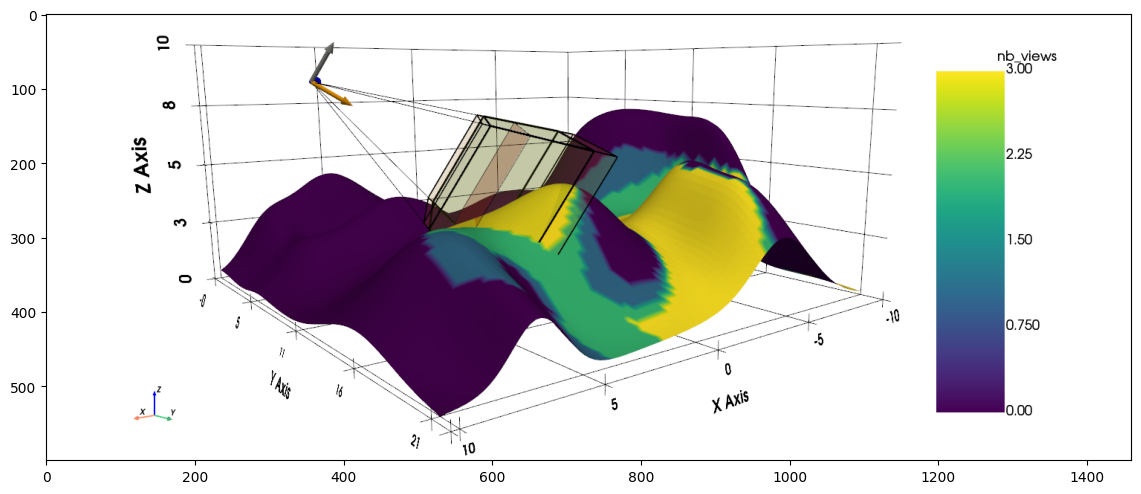

In [161]:
field = "nb_views"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

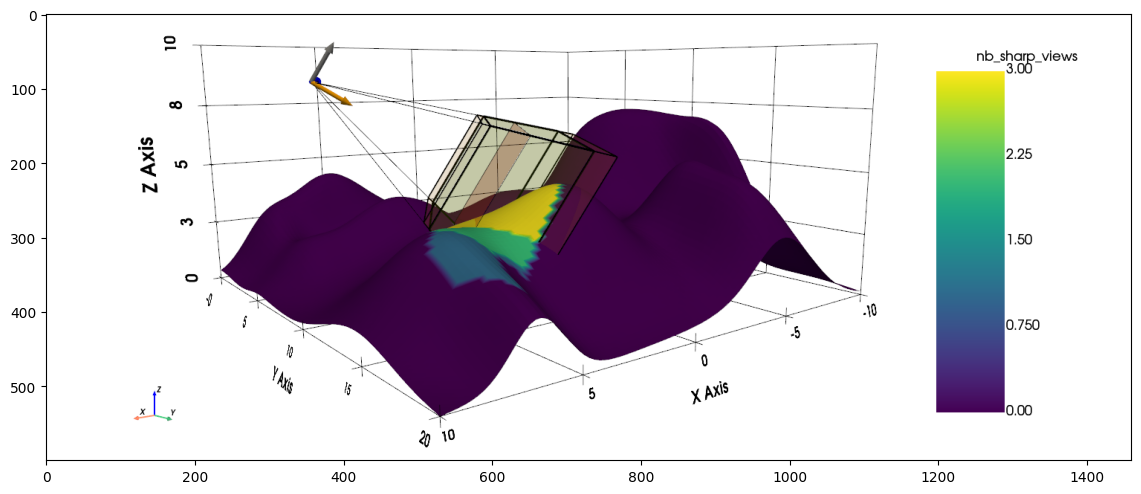

In [163]:
field = "nb_sharp_views"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

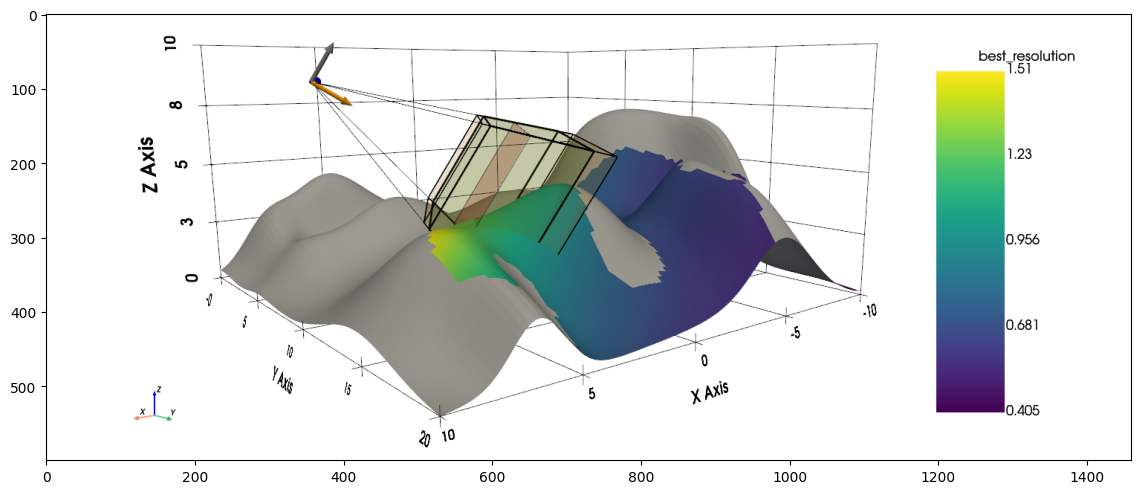

In [164]:
field = "best_resolution"
viewer.set_active_scalars(field, vertical= True)
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

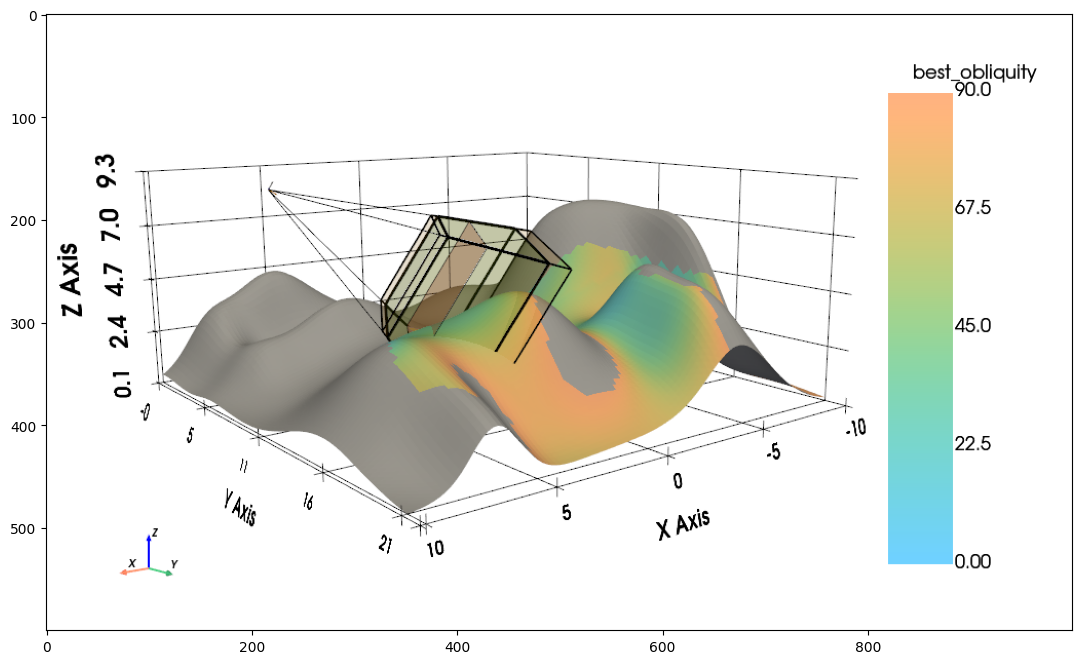

In [37]:
field = "best_obliquity"
viewer.set_active_scalars(field, vmin=0, vertical= True, cmap= "isolum")
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\field_{field}.png", dpi=300)

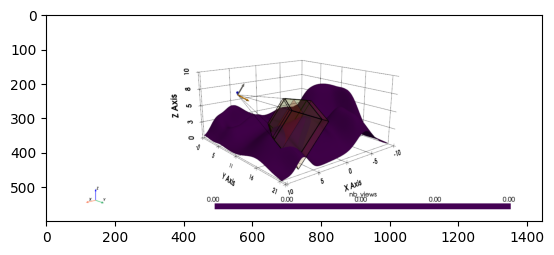

In [106]:
for field in hills.point_data.keys():
    if "diameter" in field and not "diffraction" in field:
        vmax = 2* cam.confusion_circle_diameter * 1000
        viewer.set_active_scalars(field, vmax= vmax,
                    cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= hills, vmax=vmax,
                                                            field=field)
        )
    else:
        viewer.set_active_scalars(field)
    graphics.plt.imshow(viewer.plotter.image)
    graphics.plt.gcf().set_size_inches((14,8))
    graphics.plt.gcf().savefig(dir+f"\\field_auto_{field}.png", dpi=300)

In [162]:
hills

TargetObject (0x2686968b6a0)
  N Cells:    19602
  N Points:   10000
  N Strips:   0
  X Bounds:   -1.000e+01, 1.000e+01
  Y Bounds:   -2.309e-14, 2.000e+01
  Z Bounds:   1.416e-01, 7.483e+00
  N Arrays:   44

# Demos

In [24]:
importlib.reload(graphics)

<module 'pypho.graphics' from 'C:\\Users\\glaurent\\Documents\\Dev\\Projects\\PyPho\\pypho\\graphics.py'>

In [28]:
in_dir = r"C:\Users\glaurent\Documents\Recherche\Projets\001_Photogrammetrie\travaux\008_TERD_Samples\001_NK_104_Scheelite\export\scheelite_3_textures"
source = os.path.join(in_dir,"Scheelite_natural_light.obj")
pv_obj = pv.read(source)
obj = target.TargetObject(pv_obj)
texture = pv.read_texture(os.path.join(in_dir,"Scheelite_natural_light.jpg"))

viewer = graphics.Viewer3D(objects= obj, target_object_texture= texture)

viewer.show(show_grid=False)

viewer.plotter.camera.position = (0.12980791754469842, -0.29195541793204033, 0.08577762998806361)
viewer.plotter.camera.focal_point = (0.069813, 0.007747500000000001, 0.075723)
viewer.plotter.camera.distance = 0.30581419969054957
viewer.plotter.camera.thickness = 0.13693744702406516
viewer.plotter.camera.roll = -80




Widget(value='<iframe src="http://localhost:58739/index.html?ui=P_0x17886775570_7&reconnect=auto" class="pyvis…

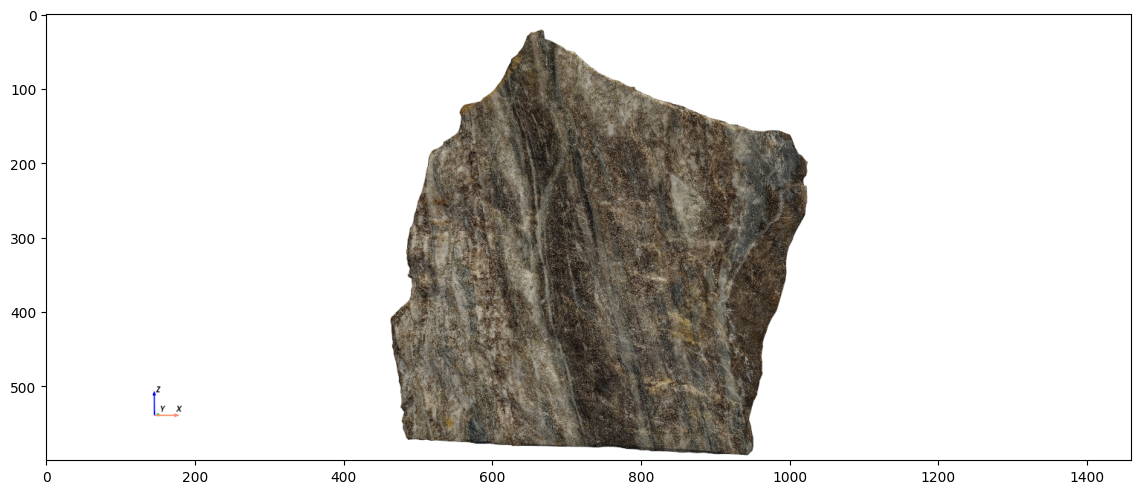

In [29]:

graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(f".\\generated\\case_scheelite_nat.png", dpi=300)

In [30]:
in_dir = r"C:\Users\glaurent\Documents\Recherche\Projets\001_Photogrammetrie\travaux\008_TERD_Samples\001_NK_104_Scheelite\export\scheelite_3_textures"
source = os.path.join(in_dir,"Scheelite_UV_254nm.obj")
pv_obj = pv.read(source)
obj = target.TargetObject(pv_obj)
texture = pv.read_texture(os.path.join(in_dir,"Scheelite_UV_254nm.jpg"))

viewer = graphics.Viewer3D(objects= obj, target_object_texture= texture)

viewer.show(show_grid=False)

viewer.plotter.camera.position = (0.12980791754469842, -0.29195541793204033, 0.08577762998806361)
viewer.plotter.camera.focal_point = (0.069813, 0.007747500000000001, 0.075723)
viewer.plotter.camera.distance = 0.30581419969054957
viewer.plotter.camera.thickness = 0.13693744702406516
viewer.plotter.camera.roll = -80


Widget(value='<iframe src="http://localhost:58739/index.html?ui=P_0x178894993f0_8&reconnect=auto" class="pyvis…

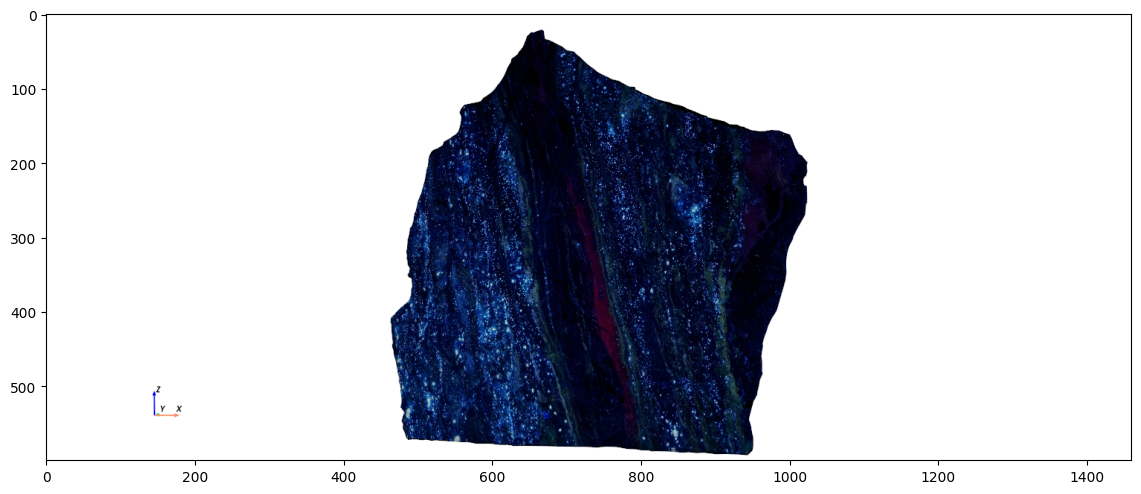

In [31]:

graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(f".\\generated\\case_scheelite_uv.png", dpi=300)

In [20]:
viewer.plotter.camera


Camera (0x178871229e0)
  Position:            (0.12980791754469842, -0.29195541793204033, 0.08577762998806361)
  Focal Point:         (0.069813, 0.007747500000000001, 0.075723)
  Parallel Projection: False
  Distance:            0.30581419969054957
  Thickness:           0.13693744702406516
  Parallel Scale:      0.10996605401327267
  Clipping Range:      (0.24551662206666194, 0.3824540690907271)
  View Angle:          30.0
  Roll:                -80.44048330950932

## Sample

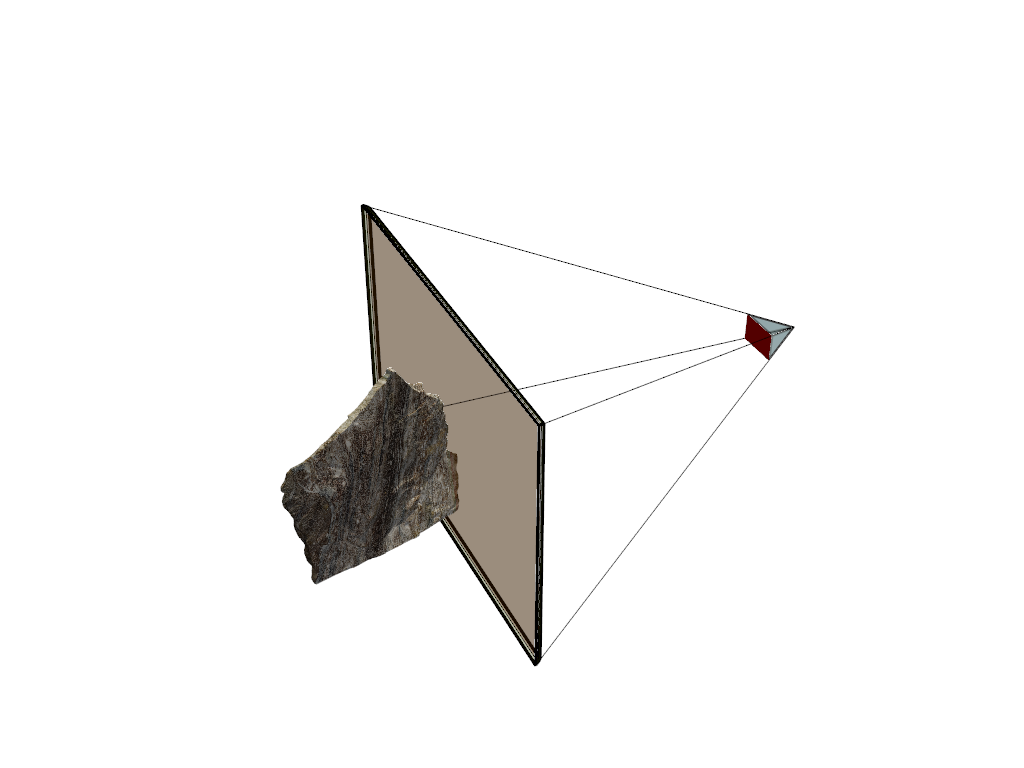

In [ ]:
in_dir = r"..\..\datasets\scheelite"
source = os.path.join(in_dir,"scheelite.obj")
pv_obj = pv.read(source)
obj = target.TargetObject(pv_obj)
texture = pv.read_texture(os.path.join(in_dir,"scheelite.jpg"))

cam = camera.get_default_camera()
cam.init_location(obj)
cam.attach_target(obj)
cam.orbit(-20)
cam.optimize_sharpness(mode= "front", outside_weight= 100)

viewer = graphics.Viewer3D(cameras= cam, objects= obj, target_object_texture= texture)

viewer.show()

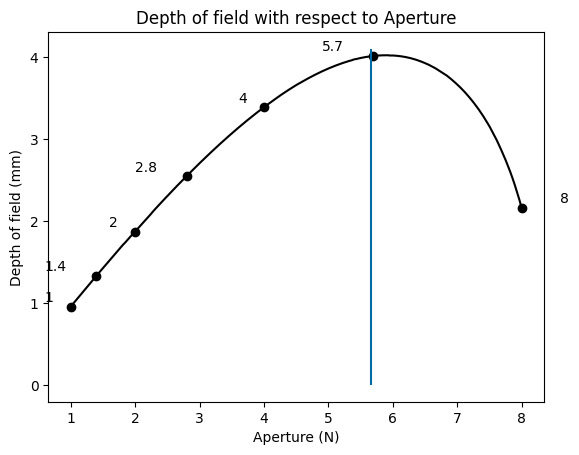

In [168]:
fig = graphics.plot_depth_of_field_vs_aperture(cam.copy())
fig.axes[0].vlines(cam.N, 0,4.1)

In [ ]:
fig.savefig(dir+r"\\case_Scheelite_N.svg")

In [171]:
cam.optimize_sharpness(
        target_points = obj.points,
        mode= "front", outside_weight= 100,
        optimize_location= True, use_diffraction= True)
viewer.update()

In [169]:
cam.Z

np.float64(0.9794900710024658)

In [173]:
field = "blur_spot_diameter"
vmax = 2* cam.confusion_circle_diameter * 1000
viewer.set_active_scalars(field, vmax= vmax, vertical= True,
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= hills, vmax=vmax,
                                                                  field=field)
                )

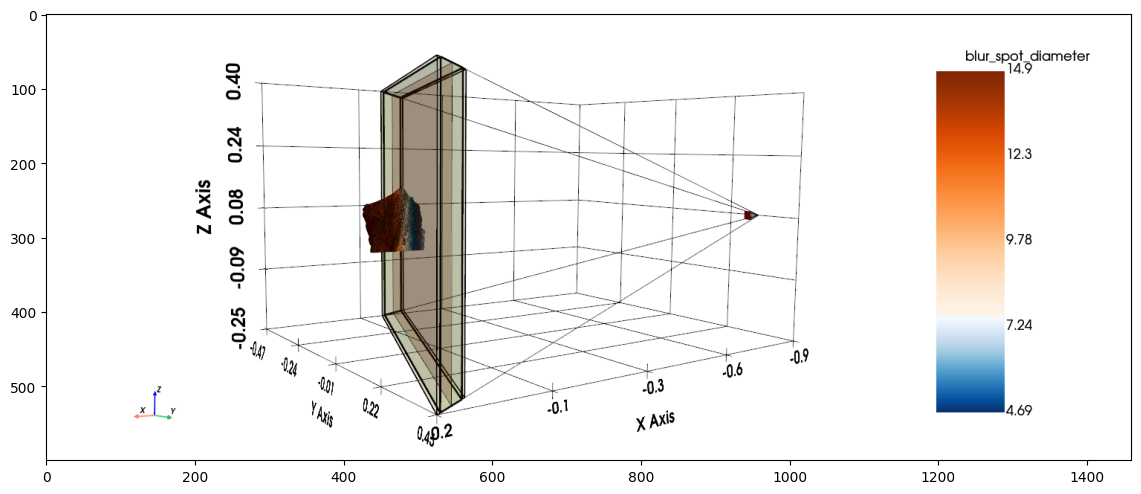

In [ ]:

graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(f".\\generated\\case_scheelite_auto.png", dpi=300)

In [189]:
viewer.show(show_cameras=False, show_objects= True)

Widget(value='<iframe src="http://localhost:54048/index.html?ui=P_0x268d82ceb60_29&reconnect=auto" class="pyvi…

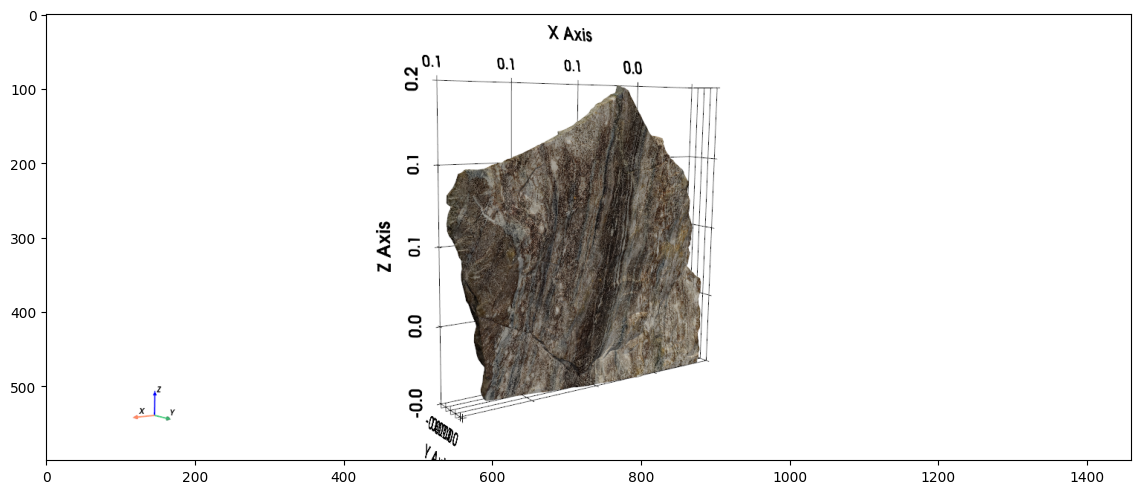

In [190]:

graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\case_scheelite.png", dpi=300)

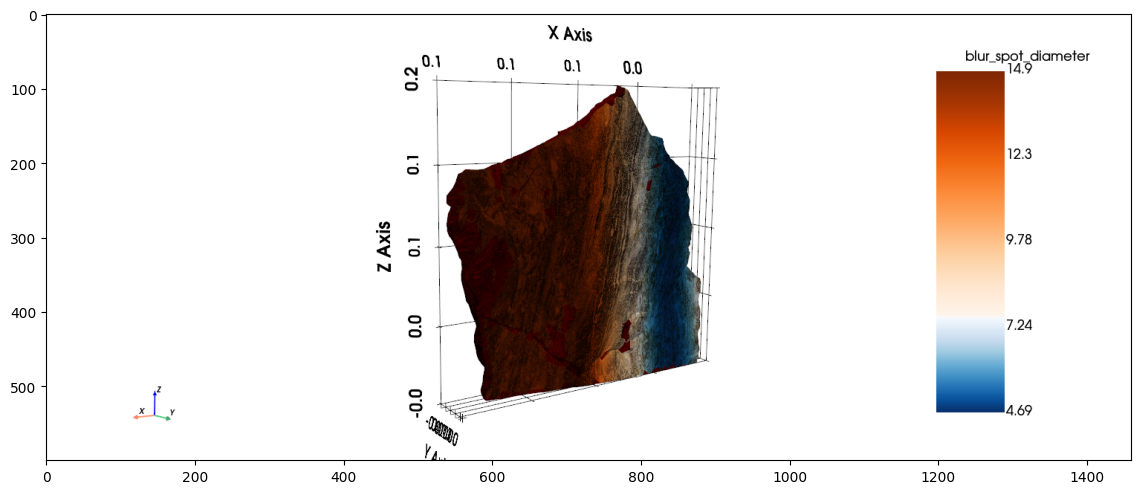

In [191]:
field = "blur_spot_diameter"
vmax = 2* cam.confusion_circle_diameter * 1000
viewer.set_active_scalars(field, vmax= vmax, vertical= True,
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam, obj= hills, vmax=vmax,
                                                                  field=field)
                )
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((14,8))
graphics.plt.gcf().savefig(dir+f"\\case_scheelite_colored.png", dpi=300)

## Outcrop

In [125]:
_ = importlib.reload(graphics)

In [112]:
dir = r"..\..\datasets\velodrome_1973"
source = os.path.join(dir,"velodrome1973_part_cc44.obj")
pv_obj = pv.read(source)
obj = target.TargetObject(pv_obj, kind= "Ground")
texture = pv.read_texture(os.path.join(dir,"velodrome1973_part_cc44.jpg"))

viewer = graphics.Viewer3D(
   objects= obj, target_object_texture= texture,
    plot_sharpness_object=False,
    plot_sharpness_object_edges=False,
    plot_diffraction_object=False,
    plot_diffraction_object_edges=False,
    plot_camera_location= True,
    plot_shot_location = True,
    camera_location_point_size_factor= 1,
    shot_location_point_size_factor=1,
    camera_location_color= "yellow",
    shot_location_color= "yellow",
    focus_plan_object_color= "grey"
)
viewer.show()

viewer.plotter.camera.position = (-718.8514176747273, 294.9136718303685, 1314.9776497080286)
viewer.plotter.camera.focal_point = (669.6083279356232, 447.93800419219207, 902.0242012362011)
viewer.plotter.camera.distance = 1500
viewer.plotter.camera.thickness = 1800
viewer.plotter.camera.roll = 90
viewer.update()

Widget(value='<iframe src="http://localhost:64673/index.html?ui=P_0x1e7d6b49120_18&reconnect=auto" class="pyvi…

In [113]:
drone = camera.CameraRegistry.get_camera("DJIM3pH", "DJIM3pH")
drone.init_location(obj)
drone.move_to([ 500,  600, 950 ])
drone.attach_target(obj, aim=False)
drone.turn(30, "up")
drone.move_to(100.0, "distance")
viewer.add_camera(drone)
viewer.update()

In [114]:
inline_step = 100
nb_inline = 4

inter_line_step = 35
nb_line = 5

direction = "right"

drone.trigger(add_to_viewer=True, update_viewer= True)
for line in range(nb_line):
    for i in range(nb_inline ):
        drone.move(inline_step, direction)
        drone.move_to(100.0, "distance")
        drone.trigger(add_to_viewer=True, update_viewer= True)
    if line != nb_line-1:
        drone.move(inter_line_step, "up")
        drone.move_to(100.0, "distance")
        drone.trigger(add_to_viewer=True, update_viewer= True)
        direction = "left" if direction == "right" else "right"


In [115]:
drone.move_to(drone.shots[0].location)
viewer.update()

In [116]:
viewer.plot_flight_path(radius = 3, color= "green")

In [117]:
obj.point_data["best_resolution(pix/m)"] = obj.point_data["best_resolution"]*1000
viewer.set_active_scalars("best_resolution(pix/m)", vertical= True)

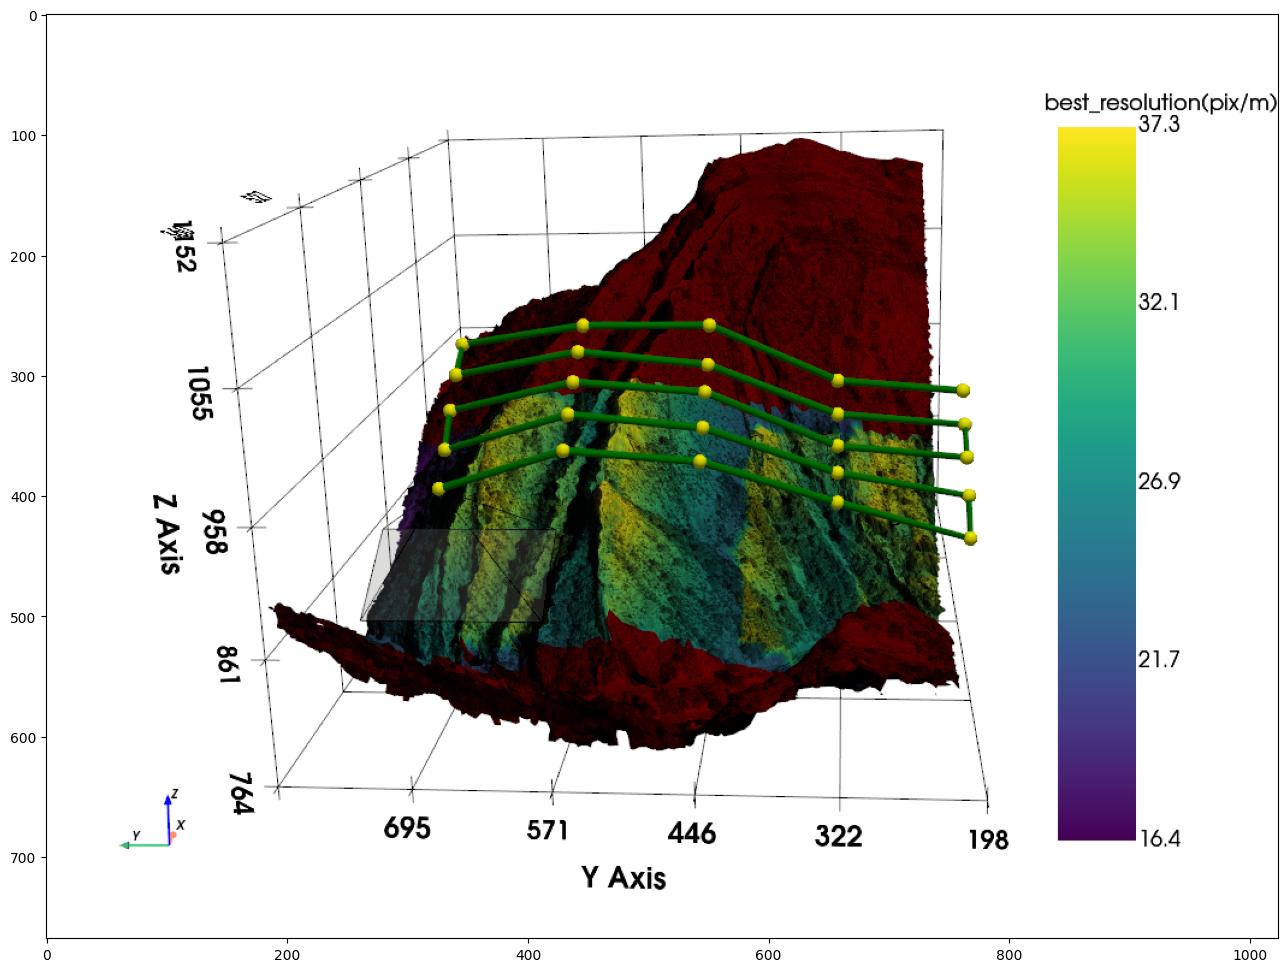

In [118]:
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((18,12))
graphics.plt.gcf().savefig(dir+f"\\case_velo_resolution.png", dpi=300)

In [119]:
viewer.set_active_scalars("best_obliquity", vmin=0, vmax= 45, vertical= True, cmap= "isolum")

In [120]:
viewer.plotter.remove_actor(viewer.flight_path_actor)
viewer.plot_overlap_graph(radius= 2, opacity= "linear")

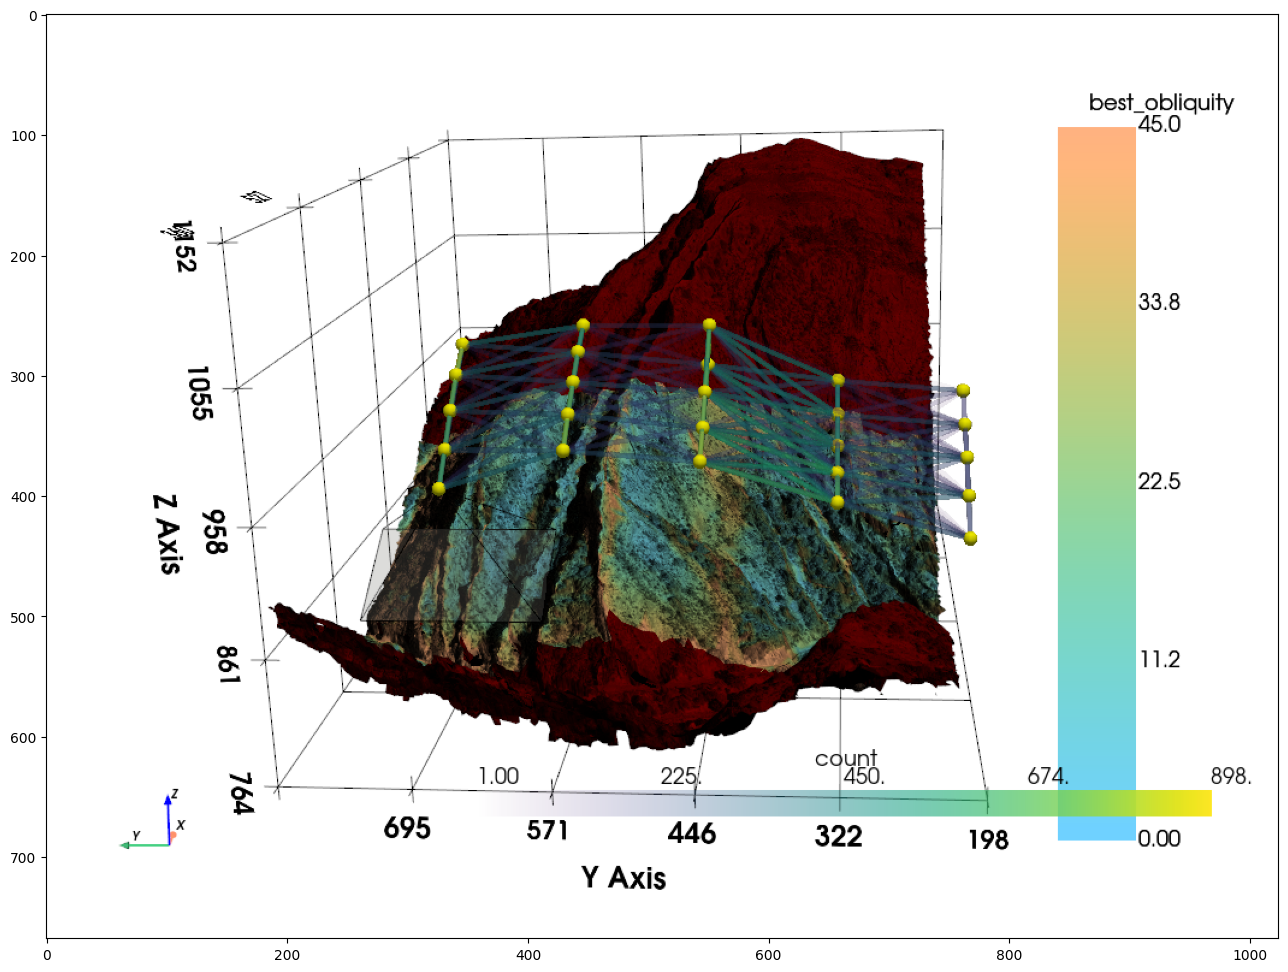

In [121]:
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((18,12))
graphics.plt.gcf().savefig(dir+f"\\case_velo_obliquity.png", dpi=300)

In [126]:

viewer = graphics.Viewer3D(
   objects= obj, target_object_texture= texture,
    plot_sharpness_object=False,
    plot_sharpness_object_edges=False,
    plot_diffraction_object=False,
    plot_diffraction_object_edges=False,
    plot_camera_location= True,
    plot_shot_location = True,
    camera_location_point_size_factor= 1,
    shot_location_point_size_factor=1,
    camera_location_color= "yellow",
    shot_location_color= "yellow",
    focus_plan_object_color= "grey",
    camera_object_opacity= 1,
    camera_object_edges_width= 5,
    focus_plan_object_opacity= 0.9
)
viewer.show()
viewer.add_camera(drone)

viewer.add_shot(drone.shots)

viewer.plotter.camera.position = (-718.8514176747273, 294.9136718303685, 1314.9776497080286)
viewer.plotter.camera.focal_point = (669.6083279356232, 447.93800419219207, 902.0242012362011)
viewer.plotter.camera.distance = 1500
viewer.plotter.camera.thickness = 1800
viewer.plotter.camera.roll = 90
viewer.update()

Widget(value='<iframe src="http://localhost:64673/index.html?ui=P_0x1e49c64fbb0_20&reconnect=auto" class="pyvi…

In [127]:
viewer.set_active_scalars("best_obliquity", vmin=0, vmax= 45, vertical= True, cmap= "isolum")

In [128]:
viewer.plot_overlap_graph(radius= 2, opacity= "sigmoid", sharp= False)

In [129]:
viewer.plot_overlap_graph(radius= 2, opacity= 0.2, sharp= False)

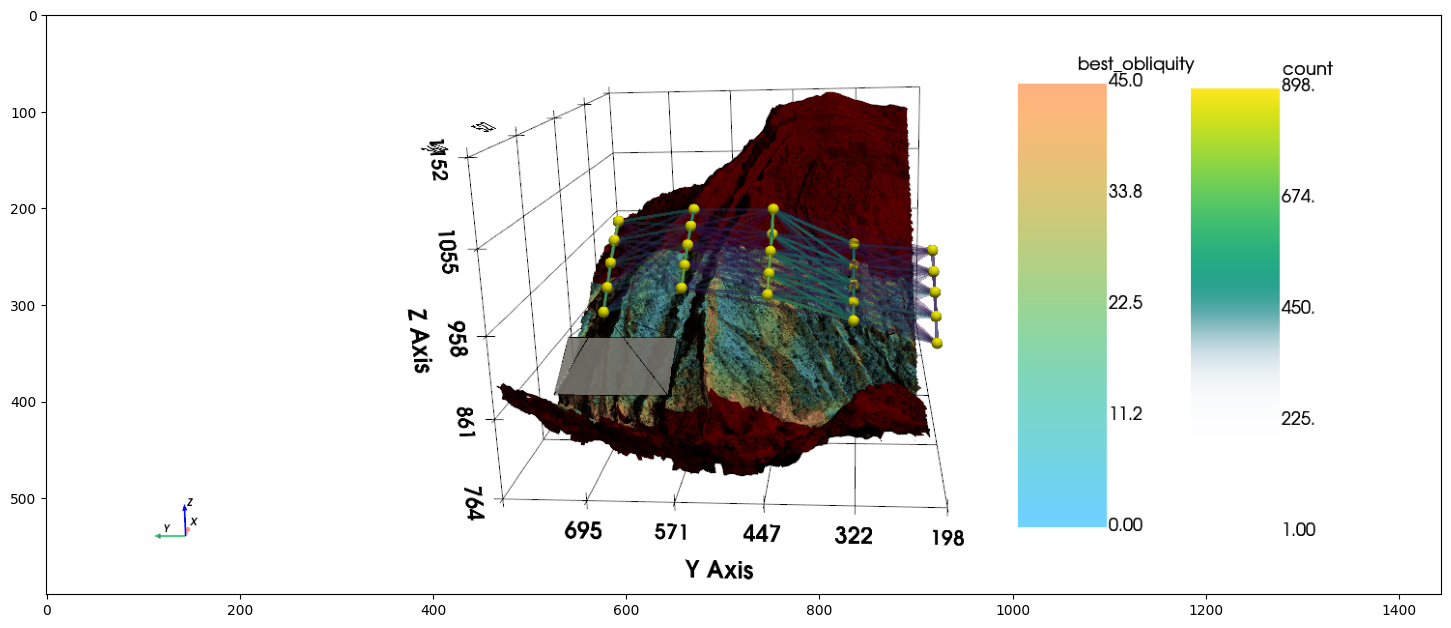

In [130]:
graphics.plt.imshow(viewer.plotter.image)
graphics.plt.gcf().set_size_inches((18,12))
graphics.plt.gcf().savefig(dir+f"\\case_velo_obliquity.png", dpi=300)

## Plug example

In [14]:
import importlib

In [76]:
_= importlib.reload(graphics)
_= importlib.reload(camera)
_= importlib.reload(target)

In [77]:
obj = target.DrillCore(nsub= 5)
cam = camera.get_default_camera()
cam.init_location(obj)
cam.attach_target(obj)
viewer = graphics.Viewer3D(cameras=cam, objects=obj, plot_sharpness_object=False, plot_diffraction_object= False, plot_sharpness_object_edges=False, plot_diffraction_object_edges= False, plot_focus_plan_object= False, plot_view_frame_object= False,
                           plot_shot_location= False, plot_shot_orientation= True)
viewer.show(show_cameras=True)

cam.optimize_sharpness(mode="middle", optimize_N= True, optimize_location= True)
viewer.update()

Widget(value='<iframe src="http://localhost:64673/index.html?ui=P_0x1e09d332f20_8&reconnect=auto" class="pyvis…

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


In [78]:
init_location = cam.location

In [71]:
cam2 = cam.copy()
cam2.update_view(location= init_location, yaw=0, pitch=0, roll=0)
cam2.attach_target(obj)
viewer2 = graphics.Viewer3D(cameras=cam2, objects=obj, plot_camera_orientation= True)
viewer2.show()
cam2.orbit(30, obj.center, [0,1,0])
cam2.optimize_sharpness(mode="front", optimize_N= True, optimize_location= False)
viewer2.update()

field = "blur_spot_diameter_all"
vmax = 2* cam2.confusion_circle_diameter * 1000
viewer2.set_active_scalars(field, vmax= vmax, vertical= True,
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam2, obj= obj, vmax=vmax,
                                                                  field=field)
                )

viewer2.plotter.camera.position = (0,-1,0.5)
viewer2.plotter.camera.focal_point = (0,0,0.5)
viewer2.plotter.camera.distance = 1
viewer2.plotter.camera.thickness = 2
viewer2.plotter.camera.roll = 00
viewer2.plotter.camera.parallel_projection = True

Widget(value='<iframe src="http://localhost:64673/index.html?ui=P_0x1e318084130_7&reconnect=auto" class="pyvis…

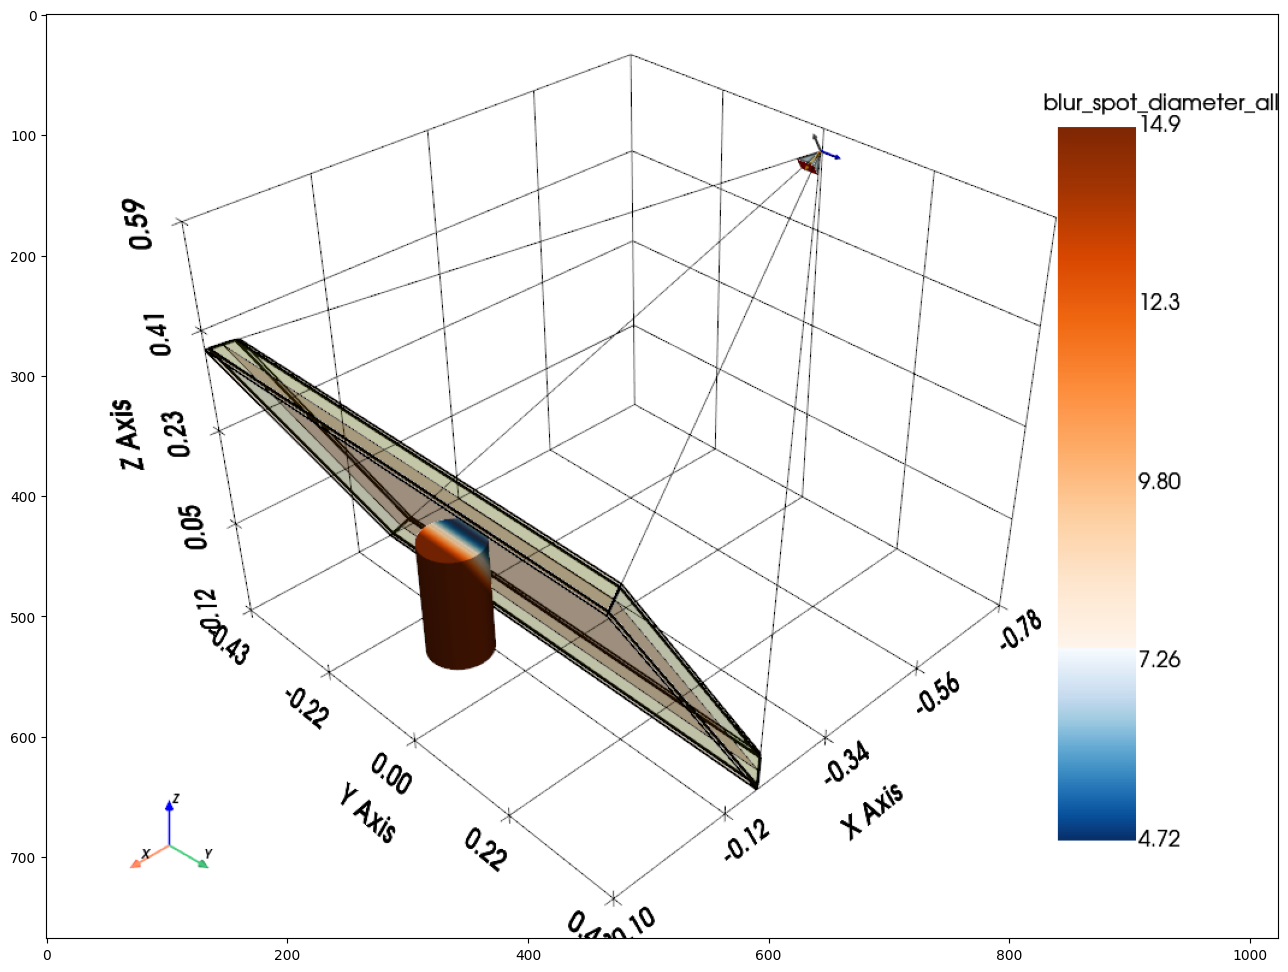

In [72]:
graphics.plt.imshow(viewer2.plotter.image)
graphics.plt.gcf().set_size_inches((18,12))
graphics.plt.gcf().savefig(dir+f"\\case_plug_blur.png", dpi=300)

In [73]:
cam2.move(0)
field = "blur_spot_diameter_all"
vmax = 2* cam2.confusion_circle_diameter * 1000
viewer2.set_active_scalars(field, vmax= vmax, vertical= True,
                          cmap= graphics.BlurSpotDiameterColormap(cam=cam2, obj= obj, vmax=vmax,
                                                                  field=field)
                )

In [74]:

viewer2.plotter.camera

Camera (0x1e2c6cf30a0)
  Position:            (0.0, -1.0, 0.5)
  Focal Point:         (0.0, 0.0, 0.5)
  Parallel Projection: True
  Distance:            1.0
  Thickness:           2.0
  Parallel Scale:      0.7162229067903907
  Clipping Range:      (0.0027474266871844693, 2.0027474266871845)
  View Angle:          30.0
  Roll:                0.0

In [79]:
# path going from to to bottom with several levels (total 18 views)

#top
cam.update_view(location= init_location, yaw=0, pitch=0, roll=0)
cam.orbit(89.9, obj.center, [0,1,0])
cam.optimize_sharpness(mode="front", optimize_N= True, optimize_location= False)
cam.trigger(add_to_viewer=True, update_viewer= True)

# first level 4 views
cam.update_view(location= init_location, yaw=0, pitch=0, roll=0)
cam.orbit(30, obj.center, [0,1,0])
cam.optimize_sharpness(mode="front", optimize_N= True, optimize_location= False)
n=4
for i in range(n):
    cam.trigger(add_to_viewer=True, update_viewer= True)
    cam.orbit(360/n, around= obj.center)
    
# middle level 8 views
cam.update_view(location= init_location, yaw=0, pitch=0, roll=0)
cam.optimize_sharpness(mode="front", optimize_N= True, optimize_location= False)
n=8
for i in range(n):
    cam.trigger(add_to_viewer=True, update_viewer= True)
    cam.orbit(360/n, around= obj.center)
    
# last level 4 views
cam.update_view(location= init_location, yaw=0, pitch=0, roll=0)
cam.orbit(-30, obj.center, [0,1,0])
cam.optimize_sharpness(mode="front", optimize_N= True, optimize_location= False)
n=4
for i in range(n):
    cam.trigger(add_to_viewer=True, update_viewer= True)
    cam.orbit(360/n, around= obj.center)
    
#bottom
cam.update_view(location= init_location, yaw=0, pitch=0, roll=0)
cam.orbit(-89.9, obj.center, [0,1,0])
cam.optimize_sharpness(mode="front", optimize_N= True, optimize_location= False)
cam.trigger(add_to_viewer=True, update_viewer= True)

C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:896: RuntimeWarning: invalid value encountered in arccos
  np.rad2deg(np.arccos(dot)),


In [80]:
viewer.set_active_scalars("nb_sharp_views")
viewer.plot_flight_path(radius = 0.003, color= "grey", opacity= 0.8)

In [226]:
obj = target.DrillCore(nsub= 5)
cam = camera.get_default_camera()
cam.init_location(obj)
cam.attach_target(obj)
viewer = graphics.Viewer3D(cameras=cam, objects=obj, plot_sharpness_object=False, plot_diffraction_object= False, plot_sharpness_object_edges=False, plot_diffraction_object_edges= False, plot_focus_plan_object= False, plot_view_frame_object= False,
                           plot_shot_location= False, plot_shot_orientation= True)
viewer.show(show_cameras=True)

cam.optimize_sharpness(mode="middle", optimize_N= True, optimize_location= True)
viewer.update()

Widget(value='<iframe src="http://localhost:50245/index.html?ui=P_0x1fd33feb2e0_50&reconnect=auto" class="pyvi…

c:\Users\glaurent\Documents\Outils\MiniForge\envs\pypho_install\lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


In [227]:
cam.update_view(orientation="portrait")
cam.orbit(-45, obj.center)
viewer.update()


C:\Users\glaurent\Documents\Dev\Projects\PyPho\pypho\camera.py:897: RuntimeWarning: invalid value encountered in arccos
  mask= z<0,


In [228]:

n_shot = 6
n_orbit = 3
orbit_angle_rad = np.deg2rad(360/n_orbit)
for orb_i in range(n_orbit):
    for i in range(n_shot):
        cam.trigger(add_to_viewer=True, update_viewer= True)
        cam.orbit(360/n_shot, obj.center, [np.cos(orb_i * orbit_angle_rad), np.sin(orb_i * orbit_angle_rad),0])
    cam.orbit(360/n_orbit, obj.center, [0,0,1])
viewer.update()

In [232]:
viewer.set_active_scalars("nb_sharp_views")

In [240]:
viewer.set_active_scalars("obliquity")

In [ ]:
viewer.set_active_scalars("nb_sharp_views")

In [229]:
flight_path_loc = np.array([shot_i.location for shot_i in cam.shots])
flight_path = pv.PolyData()
flight_path.points = flight_path_loc

cells = np.full((len(flight_path_loc) - 1, 3), 2, dtype=np.int_)
cells[:, 1] = np.arange(0, len(flight_path_loc) - 1, dtype=np.int_)
cells[:, 2] = np.arange(1, len(flight_path_loc), dtype=np.int_)
flight_path.lines = cells

In [ ]:
viewer.plot_flight_path(radius = 0.005, color= "grey", opacity= 0.8)